Pair (CPI, GDP) has 0 overlapping data points.
No overlapping data for CPI and GDP, skipping plot.
Pair (CPI, InterestRate) has 0 overlapping data points.
No overlapping data for CPI and InterestRate, skipping plot.
Pair (CPI, NFP) has 0 overlapping data points.
No overlapping data for CPI and NFP, skipping plot.
Pair (CPI, PCE) has 0 overlapping data points.
No overlapping data for CPI and PCE, skipping plot.
Pair (CPI, PPI) has 0 overlapping data points.
No overlapping data for CPI and PPI, skipping plot.
Pair (GDP, InterestRate) has 0 overlapping data points.
No overlapping data for GDP and InterestRate, skipping plot.
Pair (GDP, NFP) has 0 overlapping data points.
No overlapping data for GDP and NFP, skipping plot.
Pair (GDP, PCE) has 6 overlapping data points.


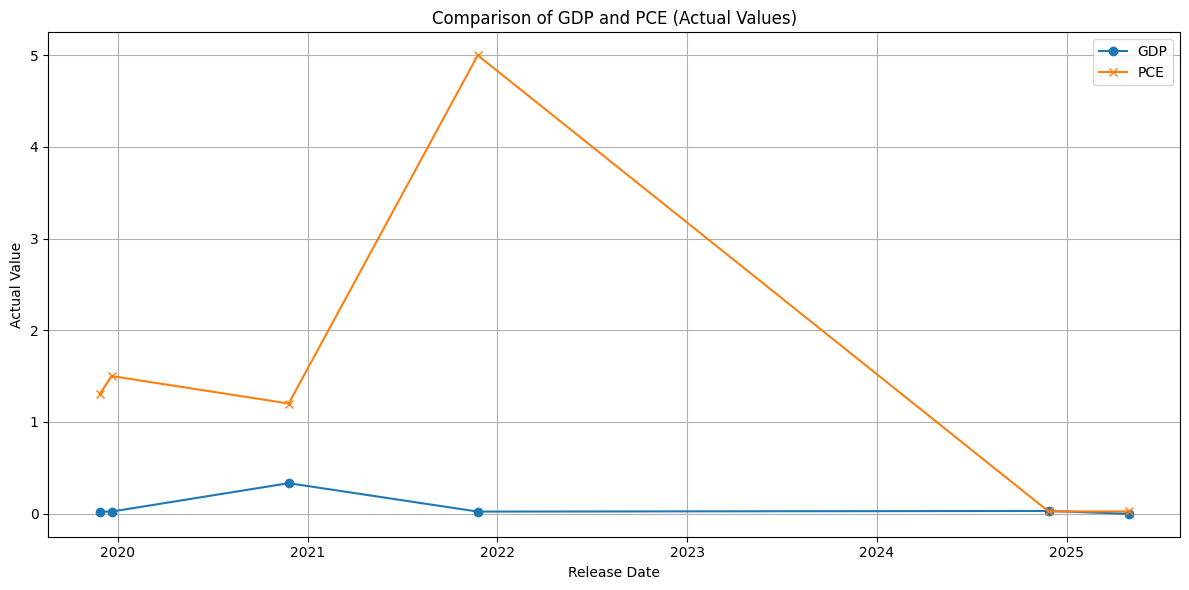

Pair (GDP, PPI) has 0 overlapping data points.
No overlapping data for GDP and PPI, skipping plot.
Pair (InterestRate, NFP) has 0 overlapping data points.
No overlapping data for InterestRate and NFP, skipping plot.
Pair (InterestRate, PCE) has 0 overlapping data points.
No overlapping data for InterestRate and PCE, skipping plot.
Pair (InterestRate, PPI) has 0 overlapping data points.
No overlapping data for InterestRate and PPI, skipping plot.
Pair (NFP, PCE) has 0 overlapping data points.
No overlapping data for NFP and PCE, skipping plot.
Pair (NFP, PPI) has 0 overlapping data points.
No overlapping data for NFP and PPI, skipping plot.
Pair (PCE, PPI) has 0 overlapping data points.
No overlapping data for PCE and PPI, skipping plot.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Your files and factors here
factor_files = {
    'CPI': 'CPI.csv',
    'GDP': 'GDP.csv',
    'InterestRate': 'InterestRate.csv',
    'NFP': 'NFP.csv',
    'PCE': 'PCE.csv',
    'PPI': 'PPI.csv'
}

def convert_to_numeric(val):
    if pd.isna(val):
        return None
    val = str(val).replace(',', '').strip()
    if val.endswith('K'):
        return float(val[:-1]) * 1_000
    elif val.endswith('M'):
        return float(val[:-1]) * 1_000_000
    else:
        try:
            return float(val)
        except:
            return None

dfs = []
for factor, file in factor_files.items():
    df = pd.read_csv(file)
    df['Release Date'] = pd.to_datetime(
        df['Release Date'].str.extract(r'(^[A-Za-z]{3} \d{1,2}, \d{4})')[0],
        format='%b %d, %Y'
    )
    df['Actual'] = df['Actual'].apply(convert_to_numeric)
    df = df[['Release Date', 'Actual']].rename(columns={'Actual': factor})
    dfs.append(df)

# Merge all dataframes on Release Date (outer join to keep all dates)
from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on='Release Date', how='outer'), dfs)
df_merged = df_merged.sort_values('Release Date').reset_index(drop=True)

# Plot each pair separately
pairs = list(combinations(factor_files.keys(), 2))

for f1, f2 in pairs:
    plot_data = df_merged[['Release Date', f1, f2]].dropna()
    print(f'Pair ({f1}, {f2}) has {len(plot_data)} overlapping data points.')
    if len(plot_data) == 0:
        print(f'No overlapping data for {f1} and {f2}, skipping plot.')
        continue
    
    plt.figure(figsize=(12,6))
    plt.plot(plot_data['Release Date'], plot_data[f1], marker='o', label=f1)
    plt.plot(plot_data['Release Date'], plot_data[f2], marker='x', label=f2)
    plt.title(f'Comparison of {f1} and {f2} (Actual Values)')
    plt.xlabel('Release Date')
    plt.ylabel('Actual Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
